# Modelo de Machine Learning usando regresión logística para predecir la pérdida de clientes de un banco

_Por: Valentina Miranda Garcés_

_septiembre de 2024_

La pérdida de clientes es un factor a considerar de alta prioridad para las compañías, pues la cantidad de clientes que logran mantener en el tiempo les brinda rentabilidad. Por el contrario, cuando un cliente deja de usar los productos o servicios de la compañía, significan pérdidas para estas.

Entender los factores que hacen que los clientes dejen la compañía puede brindar a los bancos ideas para llevar a cabo acciones y plantear estrategias para retener a sus clientes. Adicionalmente, identificar correctamente cuándo un cliente tiene mayor probabilidad de abandonar el banco le permite a estas entidades enfocar sus esfuerzos de manera efectiva.

# 1. Análisis exploratorio de los datos

In [1]:
#se importan las librerías necesarias para todo el desarrollo
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Bank Customer Churn Prediction.csv")

In [3]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Observamos que el dataset contiene 12 columnas, sin embargo, una de ellas es el `costumer id`, que desde la información brindada por Kaggle indica que es una variable que no se usa. Adicionalmente, la última columna corresponde al target, lo que queremos determinan con el modelo. Ahora sabemos entonces que contamos con 10 features o variables que vamos a estudiar más a fondo a continuación

In [4]:
#esta columna no nos brinda ninguna información relevante para el modelo
df = df.drop(['customer_id'], axis=1)

In [5]:
df.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

In [6]:
#revisar tipos de datos y cantidad de datos nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Observamos que este dataset está bastante organizado puesto que no hay ningún registro nulo, entonces podemos pasar directamente a evaluar las variables.

Algo importante a resaltar para continuar es la cantidad de variables de cada tipo (categóricas y numéricas). En primer lugar, se tiene que la mayor cantidad de variables son numéricas. Solo hay dos variables categóricas que son género y país. En género observamos que esta es una variable binaria y la podemos volver numérica. Luego para la variable de país, tendremos que conocer más sobre ella para saber qué procedimiento realizar.

Para determinar esto, además de conocer más a fondo del resto de las variables, vamos a obtener los diferentes valores que toma cada variable.

In [7]:
# Get unique values for each column
unique_values = {col: df[col].unique() for col in df.columns}

# Print unique values for each column
for col, values in unique_values.items():
    if len(values)<=15: #esta condicion es para evitar que muestre los valores de las variables numéricas continuas o con muchos valores diferentes
        print(f"Unique values in column {col}: {values}")


Unique values in column country: ['France' 'Spain' 'Germany']
Unique values in column gender: ['Female' 'Male']
Unique values in column tenure: [ 2  1  8  7  4  6  3 10  5  9  0]
Unique values in column products_number: [1 3 2 4]
Unique values in column credit_card: [1 0]
Unique values in column active_member: [1 0]
Unique values in column churn: [1 0]


Ahora vemos que la columna `country` solo toma 3 valores diferentes, por lo que podríamos pensar en usar one hot encoding para volverla numérica, pues esto solo nos adicionaría una nueva columna.

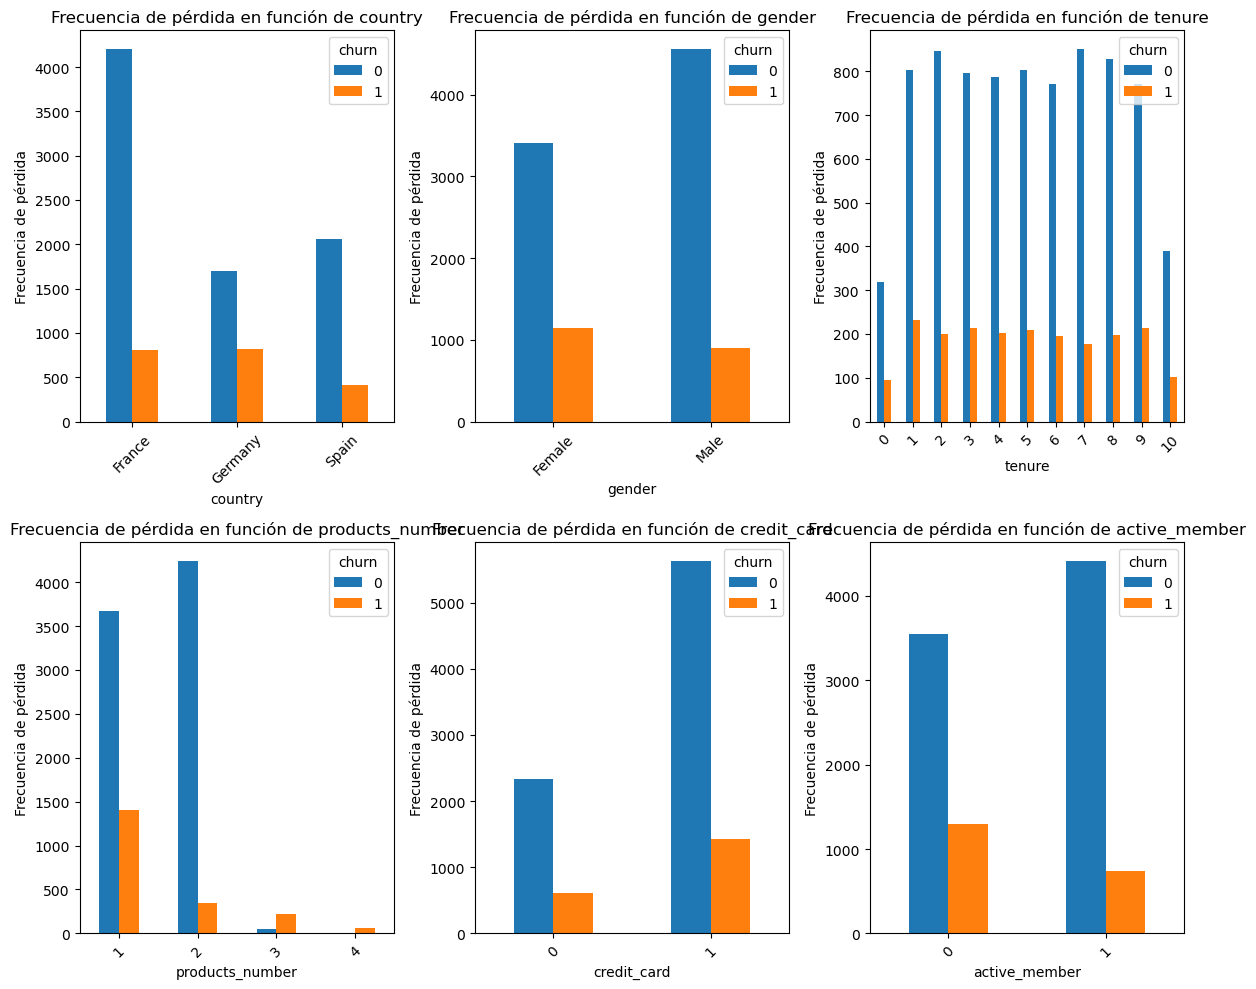

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'churn' is your target column
columns_to_plot = [column for column in df.columns if column != 'churn' and len(df[column].unique()) <= 15]

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Loop through each column and plot on the respective axis
for i, column in enumerate(columns_to_plot):
    pd.crosstab(df[column], df['churn']).plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Frecuencia de pérdida en función de {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frecuencia de pérdida')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x labels if needed

# Remove any empty subplots if there are fewer than 6 columns to plot
if len(columns_to_plot) < len(axes):
    for i in range(len(columns_to_plot), len(axes)):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


Estos crosstab nos pueden bridar información del comportamiento de las features con respecto al target.

Comenzando por `country`, vemos que normalmente en Francia no hay tanta pérdida de clientes, aunque esto en realidad no nos compete tanto, pues queremos identificar qué combinación de características hacen más probable que un cliente deje el banco. De acuerdo con esto, se observa que la mayor proporción de clientes que abandonan el banco con respecto a los que no se encuentra en Alemania, por lo que en un principio se podría pensar en considerar esta variable para el modelo.

Con `gender` y `tenure` no logro identificar una tendencia clara con estas gráficas, por lo que para estos podríamos indagar más usando otras alternativas.

Para `products_number` sucede que cuando los clientes tienen 2 productos, se observa una tendencia a mantenerse en el banco, mientras que para los clientes que tienen solo 1 producto, se muestra que hay más posibilidades de que estos abandonen en banco en comparación con los que tienen 2 productos. Esto para mí tiene sentido puesto que tener 2 productos en un banco puede indicar que un cliente confía lo suficiente en el banco y tiene la intención de seguir estando en él, por lo que decide aprovechar más su oferta de productos, mientras que al tener un solo producto, no está a ese nivel de compromiso con el banco. Con esto se podría pensar en enfocarse en ofrecer productos pertinentes para los clientes que solo tienen 1 productos con el banco en el momento, como estrategia de evitar el churn. Algo que me parece un poco extraño es que para 3 y 4 productos se muestra que abandonan el banco.

El análisis de `credit_card` para mí es un poco confuso, puesto que en proporción de personas que tienen tarjeta, muchas se quedan en el banco pero en comparación con las que no tienen tarjeta, tienden también a dejar más el banco.

Finalmente, para `active_member` se observa que cuando el cliente no es activo en el banco, parece ser un indicador de que tiene la posibilidad de dejarlo.

Por ahora nuestra lista de posibles features para el modelo va a tener:
- `country`
- `active_member`

Ahora vamos a hacer un boxplot y terminar de estudiar las demás variables continuas o con muchos valores diferentes

In [9]:
len(df.columns)

11

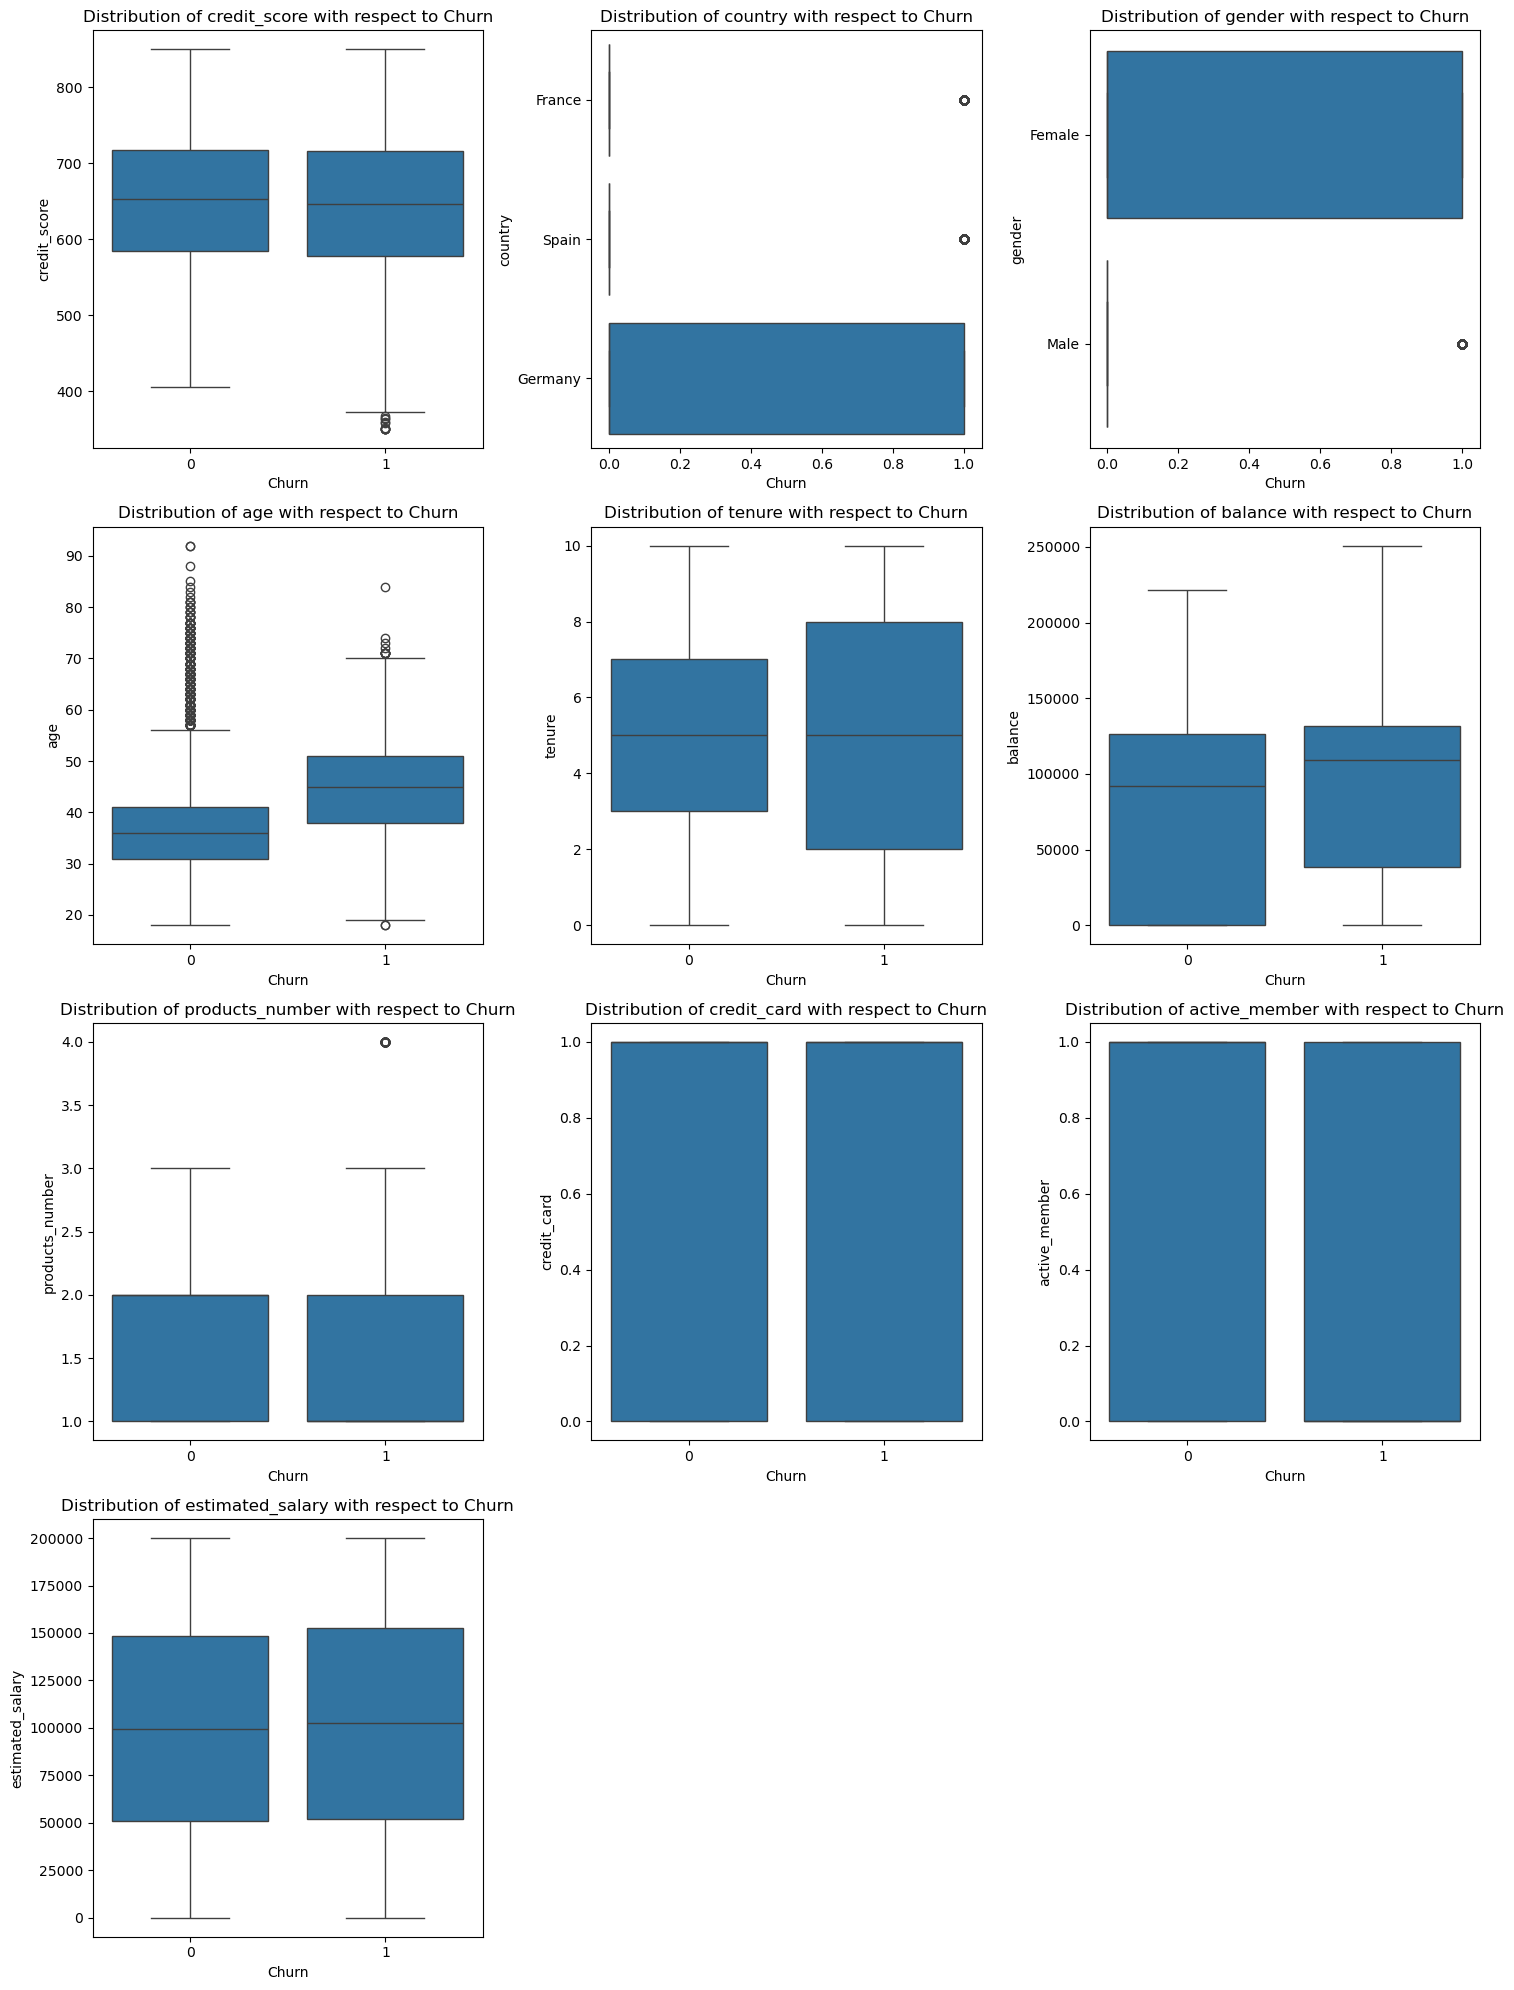

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get all features excluding 'churn'
columns_to_plot = [column for column in df.columns if column != 'churn']

# Create a 5x2 grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Loop through each feature and plot on the respective axis
for i, column in enumerate(columns_to_plot):
    sns.boxplot(x='churn', y=column, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {column} with respect to Churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(column)

# Remove any empty subplots if there are fewer than 10 columns to plot
if len(columns_to_plot) < len(axes):
    for i in range(len(columns_to_plot), len(axes)):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


De estos diagramas de cajas y bigotes también parece haber un comportamiento no tan significativo de las features.`credit_score` y `estimated_salary` parecen estar igualmente distribuidos con respecto al target. En `balance` parece haber algunos datos que se van a los extremos y hacen que la media para el churn suba en comparación con no churn.

Para `age` sucede algo un poco diferente y es que parece haber bastantes outliers, sin embargo, parece indicar que las personas más adultas tienden a abandonar el banco con mayor frecuencia que las personas jóvenes.

Con base en un desarrollo realizado en clase, vamos a obtener la media de cada variable numérica pero separada por el target. Es decir, la media de los clientes que abandonan el banco y los que se quedan para cada variable numérica. Esto podría brindarnos información relevante a considerar en el modelo

In [11]:
global_churn = df.churn.mean()
global_churn

0.2037

In [12]:
categorical = [col for col in df.columns if len(df[col].unique())<=3]

for c in categorical:
    if c != 'churn':
        print(c)
        df_group = df.groupby(c).churn.agg(['mean', 'count'])
        df_group['diff'] = df_group['mean'] - global_churn
        df_group['risk'] = df_group['mean'] / global_churn
        display(df_group)
        print()
        print()

country


,mean,count,diff,risk
country,,,,
France,0.161548,5014,-0.042152,0.793067
Germany,0.324432,2509,0.120732,1.592695
Spain,0.166734,2477,-0.036966,0.818527




gender


,mean,count,diff,risk
gender,,,,
Female,0.250715,4543,0.047015,1.230807
Male,0.164559,5457,-0.039141,0.807851




credit_card


,mean,count,diff,risk
credit_card,,,,
0,0.208149,2945,0.004449,1.021843
1,0.201843,7055,-0.001857,0.990882




active_member


,mean,count,diff,risk
active_member,,,,
0,0.268509,4849,0.064809,1.318159
1,0.142691,5151,-0.061009,0.700495


La columna `diff` muestra qué tan alto o bajo es la tasa de churn para cada grupo comparada con la tasa de churn global.

Por ejemplo, en `country`, como vimos con el crosstab, Alemania parece presentar una mayor tasa de churn.

Para `gender` hay una ligera diferencia que se marca más específicamente en la columna risk, que nos dice si este grupo tiene mayor o menor riesgo de churn en comparación con el promedio global. Mientras mayor sea el número, mayor es este riesgo. Con lo cual vemos que el grupo de mujeres tiene un riesgo de churn un poco mayor.

Con la feature `credit_card` en realidad los resultados están muy iguales, por lo que de aquí podemos determinar que no será muy significativa para nuestro modelo y por tanto la descartamos.

Por último, para `active_member` tenemos que si el cliente no es activo, tiene un mayor riesgo de churn.

In [13]:
numerical_type_cols = df.dtypes[df.dtypes != 'object'].index.tolist()
corr_num = df[numerical_type_cols].corr()

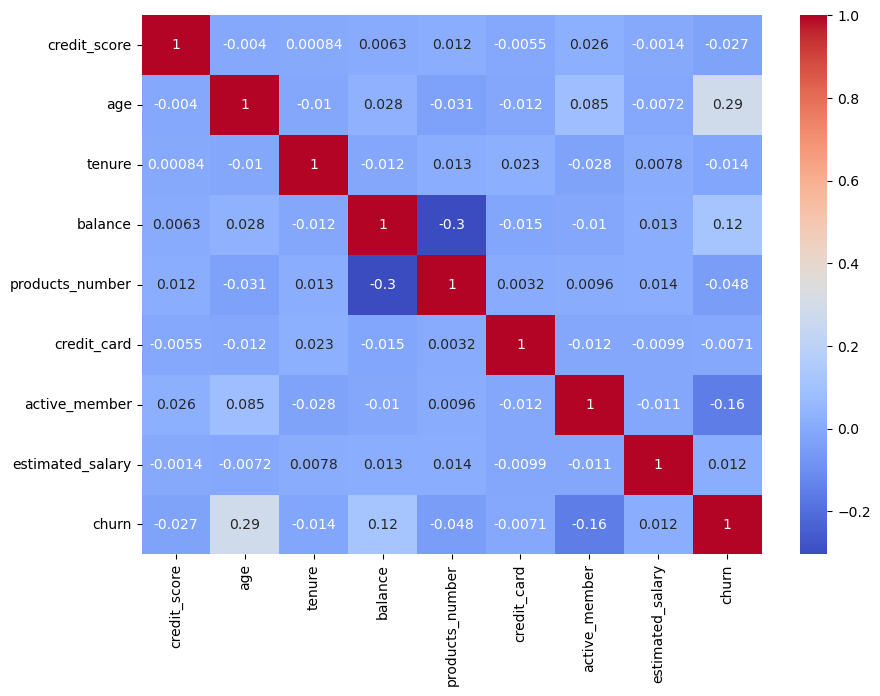

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
sns.heatmap(corr_num, cmap="coolwarm", annot=True)

plt.show()

In [15]:
from sklearn.metrics import mutual_info_score

In [16]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df.churn)

In [17]:
mi = df[df.columns].apply(mutual_info_churn_score)
#mi.sort_values(ascending=False)
mi

C:\Users\Valentina Miranda\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\Valentina Miranda\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


credit_score        0.026719
country             0.014017
gender              0.005652
age                 0.074316
tenure              0.000703
balance             0.360038
products_number     0.069953
credit_card         0.000025
active_member       0.012291
estimated_salary    0.505489
churn               0.505489
dtype: float64

In [18]:
df[numerical_type_cols].corrwith(df.churn).abs()

credit_score        0.027094
age                 0.285323
tenure              0.014001
balance             0.118533
products_number     0.047820
credit_card         0.007138
active_member       0.156128
estimated_salary    0.012097
churn               1.000000
dtype: float64

Ahora que tenemos el mutual information score y la correlación, ambos con respecto al target, vemos algunos resultados interesantes.

Lo primero es que en todos los métodos que hemos usado para estudiar las variables, ha habido indicios de que `active_member` puede llegar a ser relevante para el modelo. 

Adicionalmente, con los resultados de correlación me gustaría tomar dos features más, `age` y `balance`, que muestran la mayor correlación con el target en comparación con las demás.

Adicionalmente, otro criterio que usamos fue Mutual Information Score el cual, en comparación con la correlación, da algunos resultados diferentes. Por ejemplo para `estimated_salary`, muestra un MIS igual de alto que para la propia variable `churn`, lo cual es un poco extraño. Me gustaría considerar esta variable pero de una forma no tan definitiva. Adicionalmente, me gustaría considerar `products_number`, que tiene un MIS en el rango de las demás variables que he considerado.

Con estos resultados actualizamos nuestra lista de posibles features para el modelo:
- `country`
- `active_member`
- `age`
- `balance`
- `estimated_salary`
- `products_number`

Por último, antes de pasar preparar los datos para implementar el modelo, veremos la correlación entre las variables que elegimos para evitar tener multicolinealidad en el modelo

In [19]:
significant_vars = ['country', 'active_member', 'age', 'balance','estimated_salary','products_number']

corr_num = df[significant_vars[1:]].corr() #no tomamos la primera feature porque sigue siendo categórica

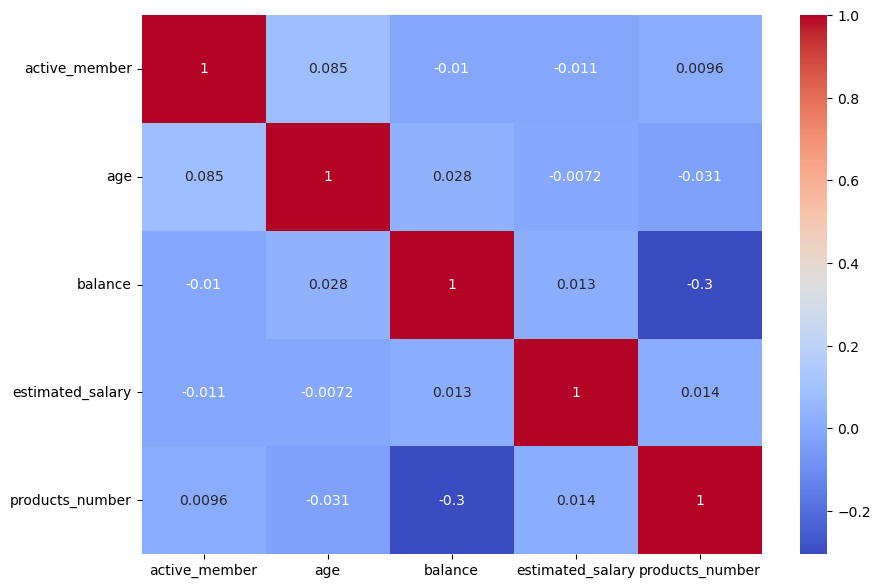

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
sns.heatmap(corr_num, cmap="coolwarm", annot=True)

plt.show()

Con lo cual observamos que no parece haber correlación entre las variables que vamos a usar para el modelo.

In [21]:
len(significant_vars)

6

# 2. Preparación de los datos

Ahora que tenemos seleccionadas las variables que consideramos que pueden ser significativas para el modelo, vamos a procesar los datos que sea necesarios. En primer lugar tenemos una variable categórica, por lo que, para poder usarla en el modelo debemos hacerla numérica. En este caso, como se mencionó anteriormente, la variable `country` tiene 3 categorías así que vamos a usar one-hot encoding para hacerla numérica.

In [22]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [23]:
df = pd.get_dummies(df, columns=['country'], drop_first=True,dtype=int)
df

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,2,1,0,96270.64,0,0,0
9996,516,Male,35,10,57369.61,1,1,1,101699.77,0,0,0
9997,709,Female,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,Male,42,3,75075.31,2,1,0,92888.52,1,1,0


Con estas nuevas columnas actualizamos la lista de variables significativas

In [24]:
significant_vars = ['country_Germany', 'country_Spain', 'active_member', 'age', 'balance','estimated_salary','products_number']

Ahora que todas las variables son numéricas, me gustaría volver a calcular el MIS y la correlación, especialmente para ver cómo cambian estos valores para las nuevas variables del OHE.

In [25]:
mi = df[significant_vars].apply(mutual_info_churn_score)
#mi.sort_values(ascending=False)
mi

C:\Users\Valentina Miranda\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\Valentina Miranda\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


country_Germany     0.014001
country_Spain       0.001434
active_member       0.012291
age                 0.074316
balance             0.360038
estimated_salary    0.505489
products_number     0.069953
dtype: float64

In [26]:
df[significant_vars].corrwith(df.churn).abs()

country_Germany     0.173488
country_Spain       0.052667
active_member       0.156128
age                 0.285323
balance             0.118533
estimated_salary    0.012097
products_number     0.047820
dtype: float64

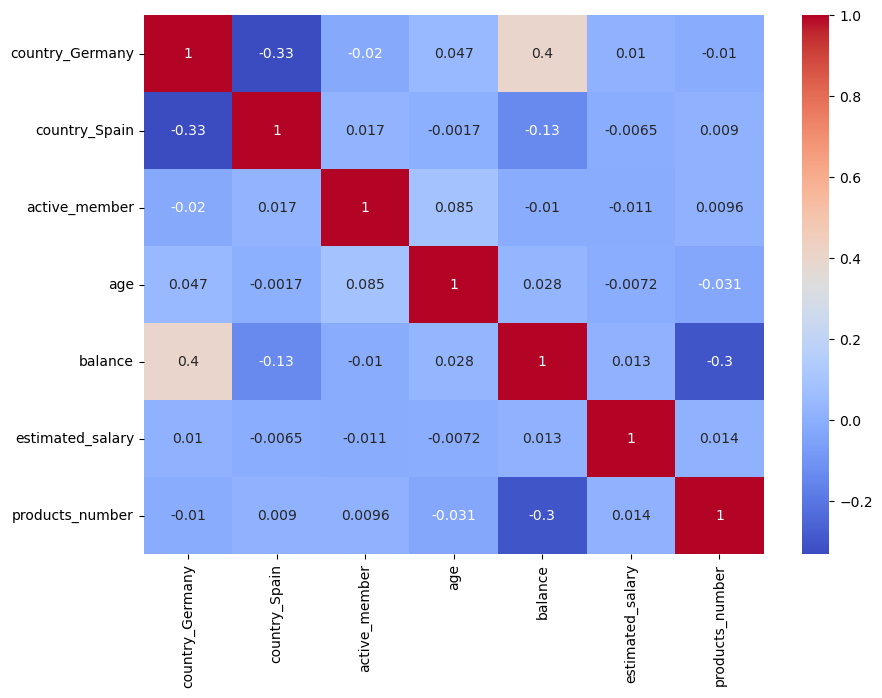

In [27]:
corr_num = df[significant_vars].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr_num, cmap="coolwarm", annot=True)

plt.show()

Como era de esperarse, la variable de `country_Germany` es más significativa que la de España, por lo que, cuando esté realizando el modelo, sería interesante probar si puede mejorar o no al eliminar la columna de España. Pero esto será algo para más adelante.

Adicionalmente, me parece algo interesante que al volver a calcular la correlación entre las nuevas variables parece haber una correlación (moderada, no alta) entre `balance` y `country_Germany`

Ahora vamos indagar un poco sobre la distribución de las variables que consideramos que pueden ser significativas e identificar si existe la posibilidad de normalizar alguna de ellas.

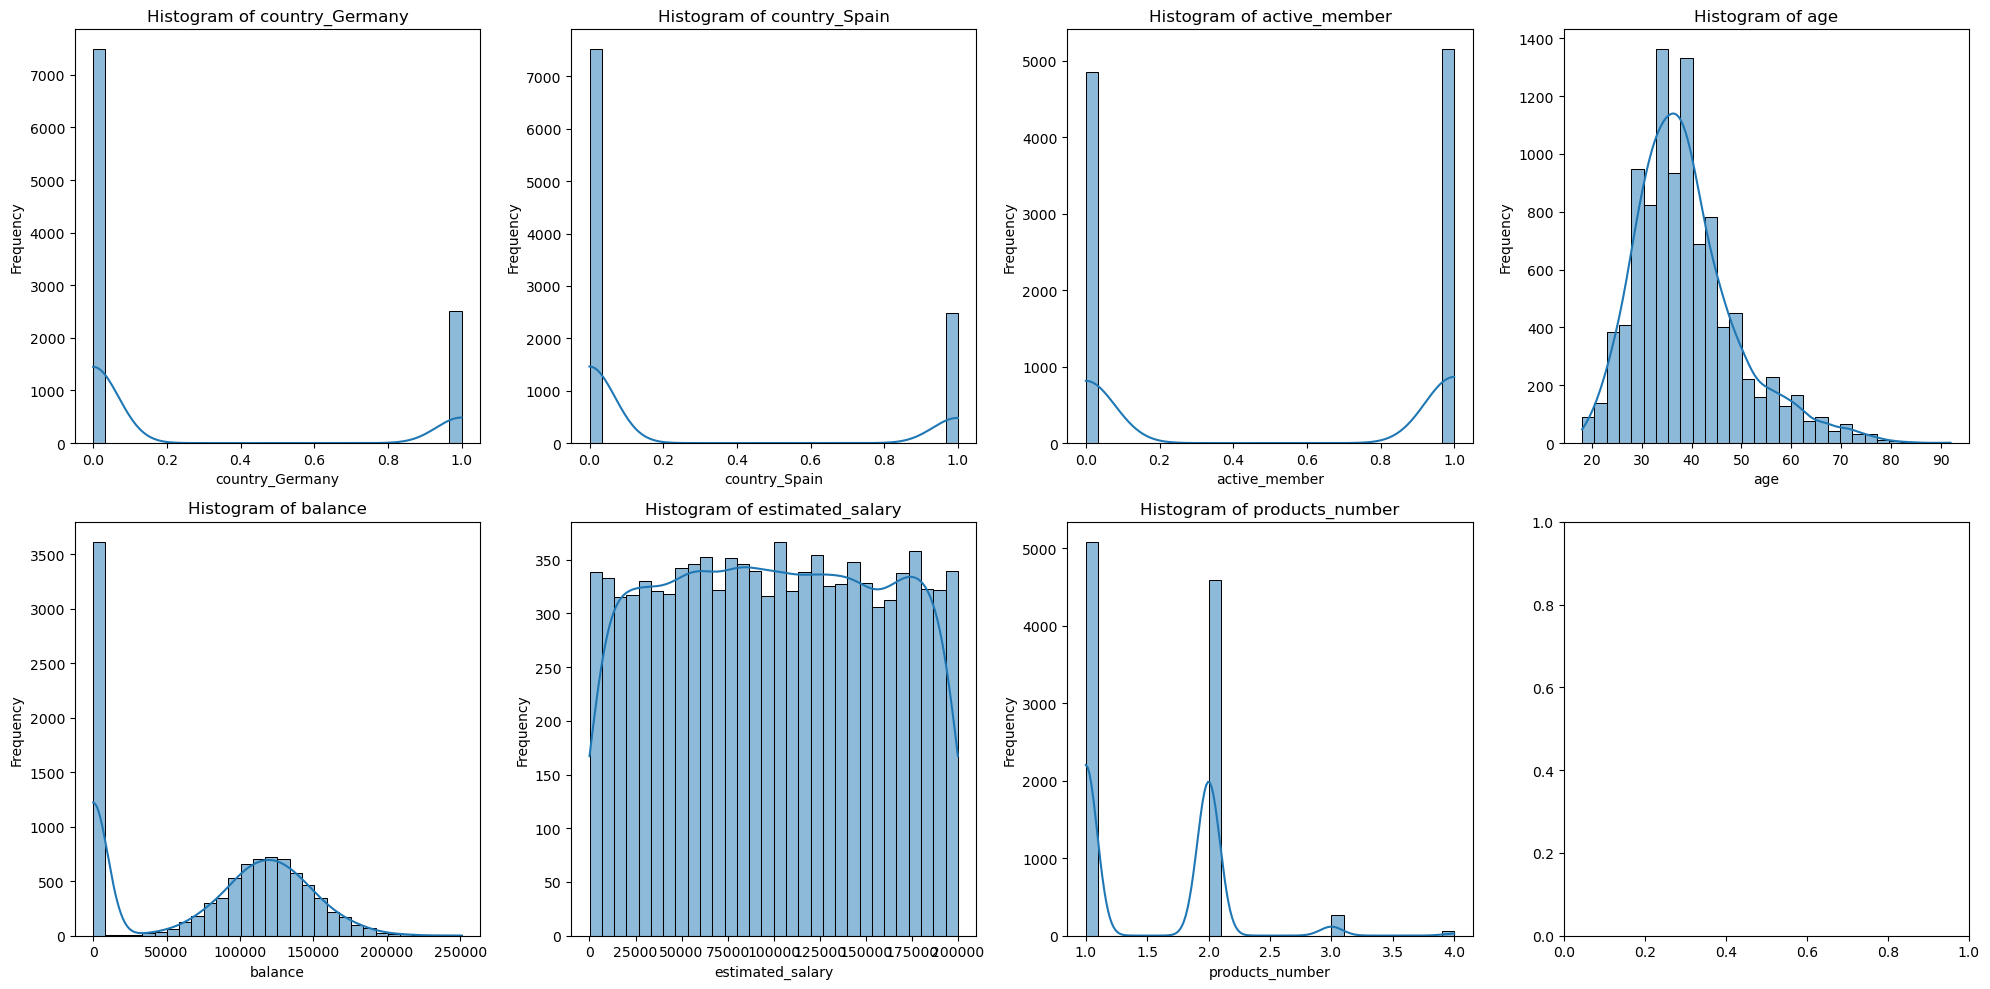

In [28]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the significant variables and plot histograms
for i, var in enumerate(significant_vars):
    sns.histplot(df[var], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

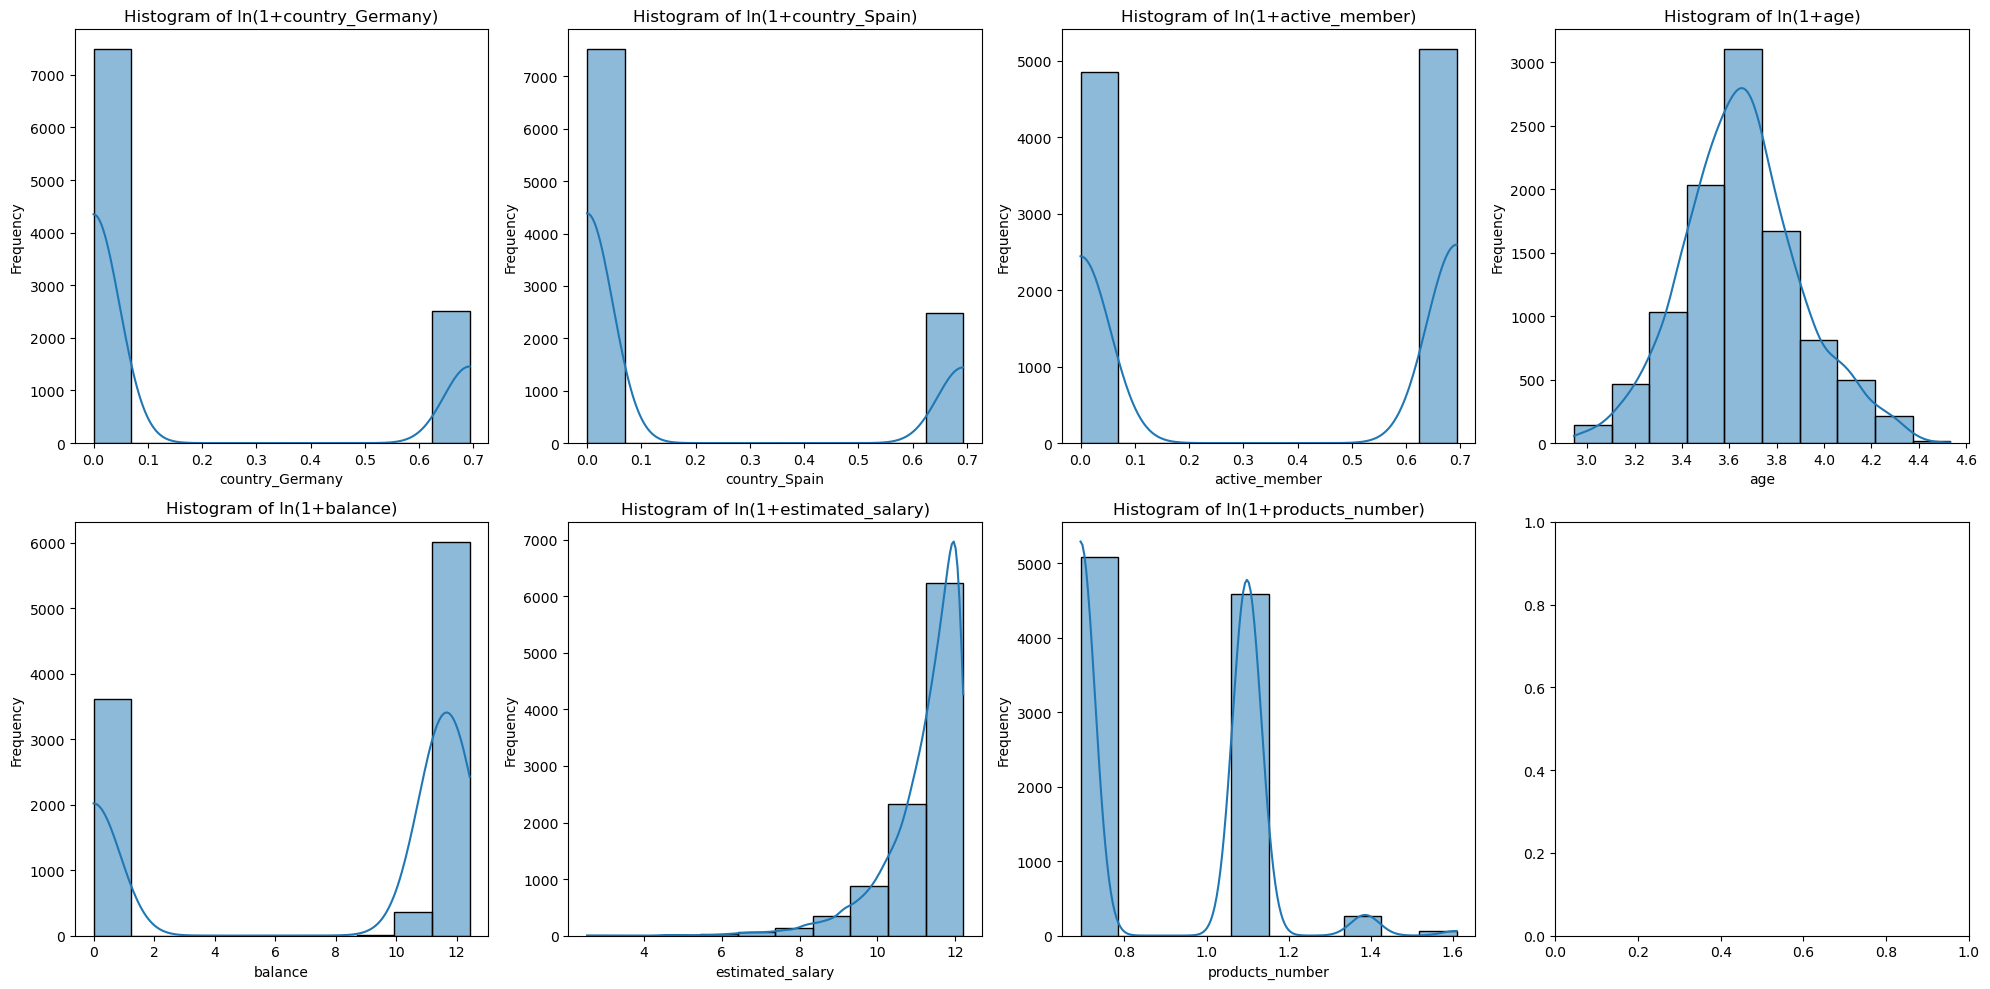

In [29]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the significant variables and plot histograms
for i, var in enumerate(significant_vars):
    sns.histplot(np.log1p(df[var]), bins=10, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of ln(1+{var})')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

Se observa que con esta transformación la distribución de la variable `age` se ajusta más a una normal, por lo que vamos a tener en cuenta esto para el modelo

In [30]:
df['age_Transformed'] = np.log1p(df['age'])

In [31]:
df

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,age_Transformed
0,619,Female,42,2,0.00,1,1,1,101348.88,1,0,0,3.761200
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,3.737670
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,3.761200
3,699,Female,39,1,0.00,2,0,0,93826.63,0,0,0,3.688879
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,3.784190
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,2,1,0,96270.64,0,0,0,3.688879
9996,516,Male,35,10,57369.61,1,1,1,101699.77,0,0,0,3.583519
9997,709,Female,36,7,0.00,1,0,1,42085.58,1,0,0,3.610918
9998,772,Male,42,3,75075.31,2,1,0,92888.52,1,1,0,3.761200


In [32]:
significant_vars = ['country_Germany', 'country_Spain', 'active_member', 'age_Transformed', 'balance','estimated_salary','products_number']

Lo siguiente será dividir el dataset para entrenar el modelo y luego evaluarlo. Para este caso se va a dividir 60% train, 20% validation y 20% validation.

In [33]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [34]:
len(df),len(df_train), len(df_val), len(df_test)

(10000, 6000, 2000, 2000)

In [35]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [36]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [37]:
df_train

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,age_Transformed
0,789,Female,32,7,69423.52,1,1,0,107499.39,0,0,3.496508
1,583,Female,41,5,77647.60,1,1,0,190429.52,1,0,3.737670
2,767,Female,35,6,132253.22,1,1,0,115566.57,1,0,3.583519
3,718,Male,48,9,0.00,2,1,1,72105.63,0,0,3.891820
4,686,Male,26,1,57422.62,1,1,1,79189.40,1,0,3.295837
...,...,...,...,...,...,...,...,...,...,...,...,...
5995,828,Male,42,10,0.00,1,1,1,186071.14,0,1,3.761200
5996,850,Female,34,9,92899.27,2,1,0,97465.89,0,0,3.555348
5997,710,Male,62,3,131078.42,2,1,0,119348.76,0,1,4.143135
5998,685,Male,33,6,0.00,1,1,0,58458.26,0,0,3.526361


# 3. Implementación de Modelo

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [39]:
model = LogisticRegression(penalty=None, fit_intercept=False)

In [40]:
#este dataset de entrenamiento va a tener las siguientes features:
'''
country_Germany, country_Spain, active_member, ageTransformed, 
balance, estimated_salary, products_number
'''

significant_vars = ['country_Germany', 'country_Spain', 'active_member', 'age_Transformed', 'balance','estimated_salary','products_number']

df_fullSV = df_train[significant_vars]
df_fullSV

,country_Germany,country_Spain,active_member,age_Transformed,balance,estimated_salary,products_number
0,0,0,0,3.496508,69423.52,107499.39,1
1,1,0,0,3.737670,77647.60,190429.52,1
2,1,0,0,3.583519,132253.22,115566.57,1
3,0,0,1,3.891820,0.00,72105.63,2
4,1,0,1,3.295837,57422.62,79189.40,1
...,...,...,...,...,...,...,...
5995,0,1,1,3.761200,0.00,186071.14,1
5996,0,0,0,3.555348,92899.27,97465.89,2
5997,0,1,0,4.143135,131078.42,119348.76,2
5998,0,0,0,3.526361,0.00,58458.26,1


In [41]:
X_train_fullSV = df_fullSV.values

model.fit(X_train_fullSV, y_train)

LogisticRegression(fit_intercept=False, penalty=None)

In [42]:
model.coef_

array([[ 1.10882871e-10, -1.68806643e-10, -4.34458917e-10,
        -1.46518170e-09, -2.40973392e-06, -9.36945264e-06,
        -7.89022311e-10]])

Es posible observar que los coeficientes son muy pequeños, lo que indica que estas variables no llegan a ser muy relevantes para el modelo, por lo que sería importante probar con otras. Sin embargo, vamos a ver un poco más acerca de las métricas que nos da con este modelo.

In [43]:
X_val_fullSV = df_val[significant_vars].values 

In [44]:
# y_prob_val_fullSV = model.predict_proba(X_val_fullSV)[:,1]
# y_prob_val_fullSV = model.predict(X_val_fullSV)[:,1]
y_prob_val_fullSV = model.predict_proba(X_val_fullSV)
y_pred_val_fullSV = model.predict(X_val_fullSV)


In [45]:
metrics.accuracy_score(y_val, y_pred_val_fullSV)

0.7925

In [46]:
prob_df = pd.DataFrame(y_prob_val_fullSV[:, 1])
threshold = 0.1

#[0.04, 0.05, 0.07, 0.10, 0.12, 0.15, 0.18, 0.20, 0.25, 0.3, 0.4, 0.5]
prob_df['prediction'] = np.where(prob_df[0] >= threshold, 1, 0)
prob_df['actual'] = list(y_val)


#confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual).reindex(index=[0,1], columns=[0,1], fill_value=0)
confusion_matrix

actual,0,1
prediction,,
0,11,1
1,1574,414


In [47]:
TN = confusion_matrix[0][0]
TP = confusion_matrix[1][1]
FN = confusion_matrix[0][1]
FP = confusion_matrix[1][0]

sensibility = TP/(TP + FN)
sensibility

0.20824949698189135

In [48]:
f1 = TP/(TP+0.5*(FP+FN))
f1

0.3445692883895131

Text(0.5, 1.0, 'Curva ROC')

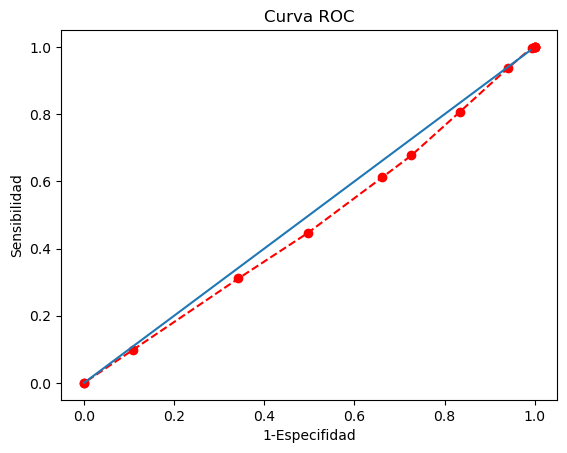

In [49]:
thresholds = [0.04, 0.05, 0.07, 0.10, 0.12, 0.15, 0.18, 0.20, 0.25, 0.3, 0.4, 0.5]
sensitivities = [1]
especifities_1 = [1]

for t in thresholds:
    prob_df["prediction"] = np.where(prob_df[0] >= t, 1, 0)
    prob_df["actual"] = list(y_val)
    prob_df.head()

    #confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
    confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual).reindex(index=[0,1], columns=[0,1], fill_value=0)
    TN = confusion_matrix[0][0]
    TP = confusion_matrix[1][1]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]

    sens = TP/(TP+FN)
    sensitivities.append(sens)
    espc_1 = 1-TN/(TN+FP)
    especifities_1.append(espc_1)

sensitivities.append(0)
especifities_1.append(0)

plt.plot(especifities_1, sensitivities, marker="o", linestyle="--", color="r")
x = [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("1-Especifidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC")

In [50]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LogisticRegression(), df_fullSV, y_train, scoring='f1_macro', cv=12)
scores

array([0.44444444, 0.44444444, 0.44444444, 0.44444444, 0.44444444,
       0.44382647, 0.44382647, 0.44382647, 0.44382647, 0.44382647,
       0.44382647, 0.44382647])

Con este cross validation por lo menos nos aseguramos de que los resultados son similares independiente del subconjunto del dataset que se tome

Lo que vemos es que es un modelo terrible, por lo que es necesario revisar si se puede mejorar algo. Todas las métricas que se probaron (precisión, recall, F1-score, curva ROC) no son para nada positivas. Lo primero que considero que sería una buena opción es probar diferentes modelos cambiando las features que se le pasaban. Anteriormente había sugerido probar un modelo sin tener en cuenta la feature dummy de España y otro sin tener en cuenta `estimated_salary`

In [51]:
significant_vars_2 = ['active_member', 'age_Transformed', 'balance','products_number']

df_try2 = df_train[significant_vars_2]
df_try2

,active_member,age_Transformed,balance,products_number
0,0,3.496508,69423.52,1
1,0,3.737670,77647.60,1
2,0,3.583519,132253.22,1
3,1,3.891820,0.00,2
4,1,3.295837,57422.62,1
...,...,...,...,...
5995,1,3.761200,0.00,1
5996,0,3.555348,92899.27,2
5997,0,4.143135,131078.42,2
5998,0,3.526361,0.00,1


In [52]:
model = LogisticRegression(penalty=None, fit_intercept=False)

X_train_try2 = df_try2.values

model.fit(X_train_try2, y_train)

model.coef_

array([[-4.04341473e-10, -1.98629599e-09, -9.37151272e-06,
        -9.83401161e-10]])

In [53]:
X_val_try2 = df_val[significant_vars_2].values 

y_prob_val_try2 = model.predict_proba(X_val_try2)
y_pred_val_try2 = model.predict(X_val_try2)

prob2_df = pd.DataFrame(y_prob_val_try2[:, 1])
threshold = 0.1

prob2_df['prediction'] = np.where(prob2_df[0] >= threshold, 1, 0)
prob2_df['actual'] = list(y_val)

confusion_matrix_2 = pd.crosstab(prob2_df.prediction, prob2_df.actual).reindex(index=[0,1], columns=[0,1], fill_value=0)
confusion_matrix_2


actual,0,1
prediction,,
0,0,0
1,1585,415


In [54]:
TN = confusion_matrix[0][0]
TP = confusion_matrix[1][1]
FN = confusion_matrix[0][1]
FP = confusion_matrix[1][0]

sensibility = TP/(TP + FN)
print(f'recall: {sensibility}')

f1 = TP/(TP+0.5*(FP+FN))
print(f'f1 score:{f1}')

recall: nan
f1 score:0.0


C:\Users\Valentina Miranda\AppData\Local\Temp\ipykernel_8964\3248722023.py:6: RuntimeWarning: invalid value encountered in scalar divide
  sensibility = TP/(TP + FN)


Text(0.5, 1.0, 'Curva ROC')

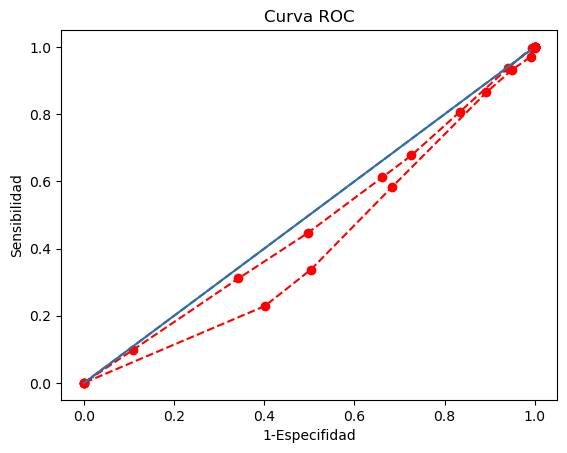

In [55]:
for t in thresholds:
    prob2_df["prediction"] = np.where(prob2_df[0] >= t, 1, 0)
    prob2_df["actual"] = list(y_val)
    prob2_df.head()

    #confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
    confusion_matrix = pd.crosstab(prob2_df.prediction, prob2_df.actual).reindex(index=[0,1], columns=[0,1], fill_value=0)
    TN = confusion_matrix[0][0]
    TP = confusion_matrix[1][1]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]

    sens = TP/(TP+FN)
    sensitivities.append(sens)
    espc_1 = 1-TN/(TN+FP)
    especifities_1.append(espc_1)

sensitivities.append(0)
especifities_1.append(0)

plt.plot(especifities_1, sensitivities, marker="o", linestyle="--", color="r")
x = [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("1-Especifidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC")

Con esto vemos que en realidad el modelo empeora, por lo que retomamos las variables iniciales. Sin embargo, con el análisis que se hizo de los datos parece no ser tan efectivo, vamos a pobrar otra alternativa que es recursive feature elimination con Scikit learn para ver si tenemos un modelo con diferentes variables a las que ya habíamos seleccionado.

In [56]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [57]:
df_train.head(2)

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,age_Transformed
0,789,Female,32,7,69423.52,1,1,0,107499.39,0,0,3.496508
1,583,Female,41,5,77647.60,1,1,0,190429.52,1,0,3.737670


In [58]:
#hacemos OHE con el dataset completo para que todas las features sea numericas

data_ohe = pd.get_dummies(df_train, columns=['gender'], dtype=int)


In [59]:
data_ohe.head(2)

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,age_Transformed,gender_Female,gender_Male
0,789,32,7,69423.52,1,1,0,107499.39,0,0,3.496508,1,0
1,583,41,5,77647.60,1,1,0,190429.52,1,0,3.737670,1,0


eliminamos la columna `gender_Male` porque la columna inicial `gender` es binaria entonces solo se necesita 1 columna

In [60]:
del data_ohe['gender_Male']

Inicialmente teníamos 6 features que consideramos significativas, por lo que vamos a usar este mismo parámetro para rfe

In [61]:
n = 7

rfe = RFE(lr, n_features_to_select=n)
rfe.fit(data_ohe.values, y_train)

data_ohe.columns[rfe.support_]

C:\Users\Valentina Miranda\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Valentina Miranda\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

Index(['products_number', 'credit_card', 'active_member', 'country_Germany',
       'country_Spain', 'age_Transformed', 'gender_Female'],
      dtype='object')

In [62]:
significant_vars

['country_Germany',
 'country_Spain',
 'active_member',
 'age_Transformed',
 'balance',
 'estimated_salary',
 'products_number']

En vez de usar `balance` y `estimated_salary`, con el rfe vamos a usar `gender_Female` y `credit_card`, lo cual tiene sentido con en análisis inicial que se obtuvo de los datos, donde se mencionó que estas dos features también brindaban algo de información.

Vemos que hay warnings que indica que no hay convergencia, pero de igual forma probamos el modelo con estas features que en realidad la mayoría ya fueron consideradas en el modelo inicial.

In [63]:
cols = data_ohe.columns[rfe.support_]
X_rfe = data_ohe[cols]

lr = LogisticRegression(penalty=None)
lr.fit(X_rfe, y_train)

LogisticRegression(penalty=None)

In [79]:
lr.coef_

array([[-0.12888826, -0.08921918, -1.04074992,  0.86569168,  0.11409841,
         3.43958433,  0.58854798]])

Estos coeficientes tienen valores más significativos que los del modelo anterior, lo que indica que se les da un mayor peso a cada una de las variables seleccionadas. Específicamente podemos notar que hay un coeficiente mucho más alto que los demás. Este corresponde (de acuerdo con el orden en el que están dados los índices desde el rfe) con la variable `age_transformed`, que, como vimos, marcaba tendencias medianamente claras sobre que las personas más adultas tenía mayor tendencia a abandonar el banco. 

In [64]:
df_val_rfe = pd.get_dummies(df_val, columns=['gender'], dtype=int)
del df_val_rfe['gender_Male']


proba_rfe = lr.predict_proba(df_val_rfe[df_val_rfe.columns[rfe.support_]])

prediction_rfe = lr.predict(df_val_rfe[df_val_rfe.columns[rfe.support_]])

prob_df = pd.DataFrame(proba_rfe[:, 1])
threshold = 0.1
prob_df['prediction'] = np.where(prob_df[0] >= threshold, 1, 0)
prob_df['actual'] = list(y_val)
#confusion_matrix = pd.crosstab(prob2_df.prediction, prob2_df.actual).reindex(index=[0,1], columns=[0,1], fill_value=0)
confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
prob_df.head()

,0,prediction,actual
0,0.058034,0,0
1,0.432578,1,1
2,0.049348,0,0
3,0.197547,1,0
4,0.053704,0,0


In [65]:
confusion_matrix

actual,0,1
prediction,,
0,620,47
1,965,368


In [66]:
TN = confusion_matrix[0][0]
TP = confusion_matrix[1][1]
FN = confusion_matrix[0][1]
FP = confusion_matrix[1][0]

print(f'accuracy: {metrics.accuracy_score(y_val, prob_df['prediction'])}')

sensibility = TP/(TP + FN)
print(f'recall: {sensibility}')

f1 = TP/(TP+0.5*(FP+FN))
print(f'f1 score:{f1}')

accuracy: 0.494
recall: 0.2760690172543136
f1 score:0.42105263157894735


Text(0.5, 1.0, 'Curva ROC')

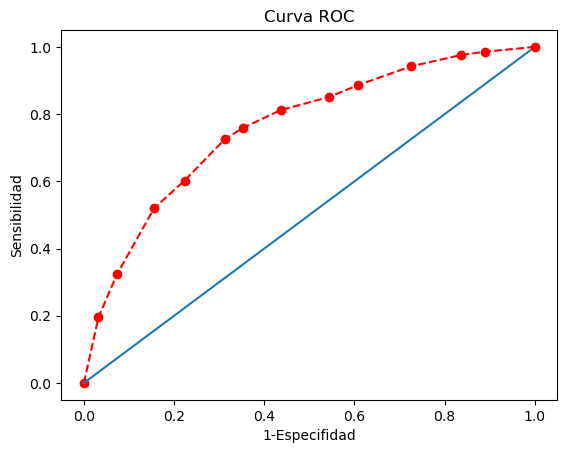

In [67]:
thresholds = [0.04, 0.05, 0.07, 0.10, 0.12, 0.15, 0.18, 0.20, 0.25, 0.3, 0.4, 0.5]
sensitivities = [1]
especifities_1 = [1]

for t in thresholds:
    prob_df["prediction"] = np.where(prob_df[0] >= t, 1, 0)
    prob_df["actual"] = list(y_val)
    prob_df.head()

    #confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
    confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual).reindex(index=[0,1], columns=[0,1], fill_value=0)
    TN = confusion_matrix[0][0]
    TP = confusion_matrix[1][1]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]

    sens = TP/(TP+FN)
    sensitivities.append(sens)
    espc_1 = 1-TN/(TN+FP)
    especifities_1.append(espc_1)

sensitivities.append(0)
especifities_1.append(0)

plt.plot(especifities_1, sensitivities, marker="o", linestyle="--", color="r")
x = [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("1-Especifidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC")

In [68]:
from sklearn.metrics import roc_curve, roc_auc_score

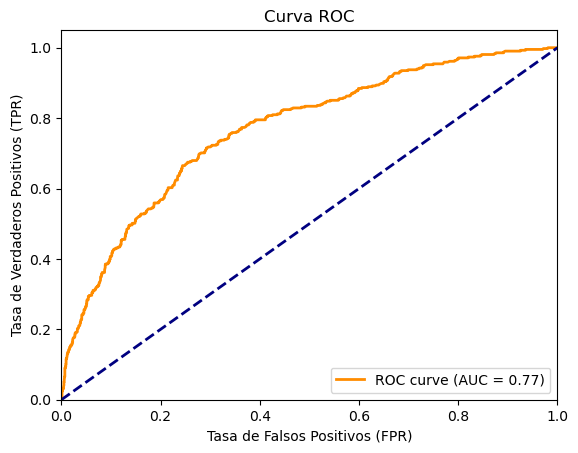

In [69]:
fpr, tpr, thresholds = roc_curve(y_val, proba_rfe[:, 1])
roc_auc = roc_auc_score(y_val, proba_rfe[:, 1])

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Con este nuevo modelo que parece tener mejores resultados, vamos a probar con el set `test`

accuracy: 0.5175
recall: 0.19518072289156627
f1 score:0.2961608775137112


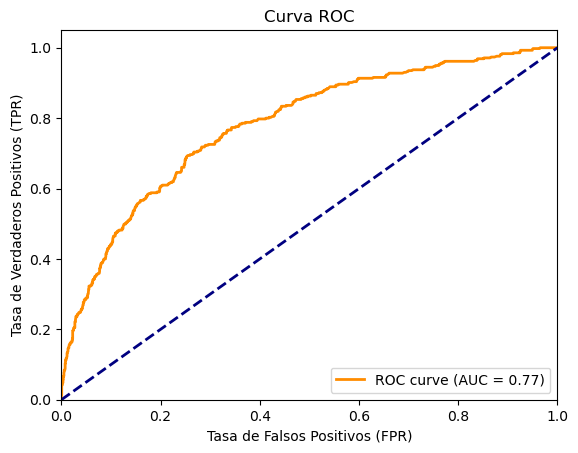

In [70]:
df_test_rfe = pd.get_dummies(df_test, columns=['gender'], dtype=int)
del df_test_rfe['gender_Male']


proba_rfe_test = lr.predict_proba(df_test_rfe[df_test_rfe.columns[rfe.support_]])

prediction_rfe_test = lr.predict(df_test_rfe[df_test_rfe.columns[rfe.support_]])

prob_df_test = pd.DataFrame(proba_rfe_test[:, 1])
threshold = 0.1
prob_df_test['prediction'] = np.where(prob_df_test[0] >= threshold, 1, 0)
prob_df_test['actual'] = list(y_test)
#confusion_matrix = pd.crosstab(prob2_df.prediction, prob2_df.actual).reindex(index=[0,1], columns=[0,1], fill_value=0)
confusion_matrix_test = pd.crosstab(prob_df_test.prediction, prob_df_test.actual)
#prob_df_test.head()

TN_test = confusion_matrix_test[0][0]
TP_test = confusion_matrix_test[1][1]
FN_test = confusion_matrix_test[0][1]
FP_test = confusion_matrix_test[1][0]

print(f'accuracy: {metrics.accuracy_score(y_test, prob_df_test['prediction'])}')

sensibility_test = TP/(TP + FN)
print(f'recall: {sensibility_test}')

f1_test = TP/(TP+0.5*(FP+FN))
print(f'f1 score:{f1_test}')

fpr, tpr, thresholds = roc_curve(y_test, proba_rfe_test[:, 1])
roc_auc = roc_auc_score(y_val, proba_rfe[:, 1])

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Ahora vamos a intentar con Random Forest

In [71]:
#from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [72]:
forest = forest = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=100)

forest.fit(X_rfe, y_train)

RandomForestClassifier(n_jobs=2, oob_score=True)

In [73]:
df_val_RF = pd.get_dummies(df_val, columns=['gender'], dtype=int)
del df_val_RF['gender_Male']


proba_RF = forest.predict_proba(df_val_RF[df_val_RF.columns[rfe.support_]])

prediction_RF = forest.predict(df_val_RF[df_val_RF.columns[rfe.support_]])

prob_df_RF = pd.DataFrame(proba_RF[:, 1])
threshold = 0.1
prob_df_RF['prediction'] = np.where(prob_df_RF[0] >= threshold, 1, 0)
prob_df_RF['actual'] = list(y_val)
#confusion_matrix = pd.crosstab(prob2_df.prediction, prob2_df.actual).reindex(index=[0,1], columns=[0,1], fill_value=0)
confusion_matrix = pd.crosstab(prob_df_RF.prediction, prob_df_RF.actual)
prob_df_RF.head()

,0,prediction,actual
0,0.000000,0,0
1,0.550500,1,1
2,0.000000,0,0
3,0.010139,0,0
4,0.000000,0,0


In [74]:
confusion_matrix

actual,0,1
prediction,,
0,1008,107
1,577,308


In [75]:
TN = confusion_matrix[0][0]
TP = confusion_matrix[1][1]
FN = confusion_matrix[0][1]
FP = confusion_matrix[1][0]

accuracy = (TP+TN)/(TP+TN+FP+FN)
print(f'accuracy: {accuracy}')

sensibility = TP/(TP + FN)
print(f'recall: {sensibility}')

f1 = TP/(TP+0.5*(FP+FN))
print(f'f1 score:{f1}')

accuracy: 0.658
recall: 0.3480225988700565
f1 score:0.47384615384615386


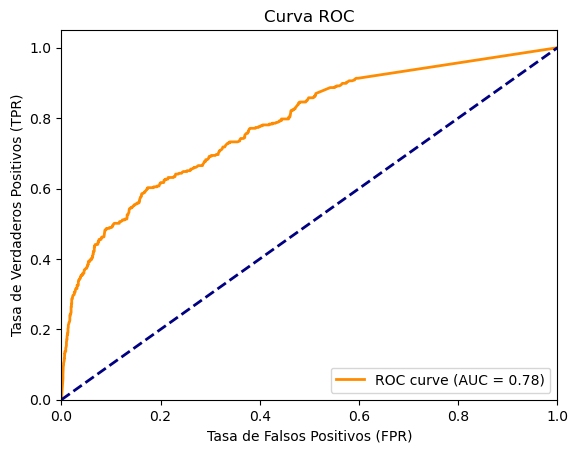

In [76]:
fpr, tpr, thresholds = roc_curve(y_val, proba_RF[:, 1])
roc_auc = roc_auc_score(y_val, proba_RF[:, 1])

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [77]:
forest.oob_score_

0.8358333333333333

accuracy: 0.68
recall: 0.3480225988700565
f1 score:0.47384615384615386


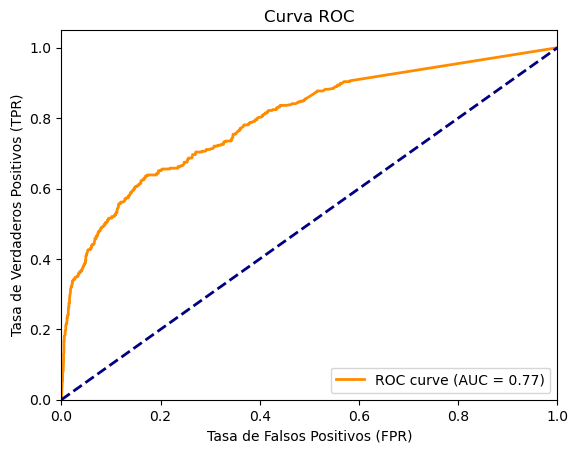

In [78]:
#df_test_rfe = pd.get_dummies(df_test, columns=['gender'], dtype=int)
#del df_test_rfe['gender_Male']


proba_rfe_test = forest.predict_proba(df_test_rfe[df_test_rfe.columns[rfe.support_]])

prediction_rfe_test = forest.predict(df_test_rfe[df_test_rfe.columns[rfe.support_]])

prob_df_test = pd.DataFrame(proba_rfe_test[:, 1])
threshold = 0.1
prob_df_test['prediction'] = np.where(prob_df_test[0] >= threshold, 1, 0)
prob_df_test['actual'] = list(y_test)
#confusion_matrix = pd.crosstab(prob2_df.prediction, prob2_df.actual).reindex(index=[0,1], columns=[0,1], fill_value=0)
confusion_matrix_test = pd.crosstab(prob_df_test.prediction, prob_df_test.actual)
#prob_df_test.head()

TN_test = confusion_matrix_test[0][0]
TP_test = confusion_matrix_test[1][1]
FN_test = confusion_matrix_test[0][1]
FP_test = confusion_matrix_test[1][0]

print(f'accuracy: {metrics.accuracy_score(y_test, prob_df_test['prediction'])}')

sensibility_test = TP/(TP + FN)
print(f'recall: {sensibility_test}')

f1_test = TP/(TP+0.5*(FP+FN))
print(f'f1 score:{f1_test}')

fpr, tpr, thresholds = roc_curve(y_test, proba_rfe_test[:, 1])
roc_auc = roc_auc_score(y_val, proba_rfe[:, 1])

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Conclusiones

Los modelos que se construyeron durante el desarrollo parecen no ser tan buenos para determinar si un cliente dejará el banco. A pesar de que las métricas fueron mejorando un poco, sus valores no llegan a ser muy óptimos. Es cierto que con Random Forest se pudo mejorar, y lo que más resalto es que permitió generalizar de manera más efectiva puesto que al probar el modelo normal de regresión logística con la data de test, las métricas bajaron mientras que con Random Forest se mantuvieron. 

También me parece importante mencionar que fue un proceso difícil identificar claramente las variables significativas para el modelo y, como vimos en el primer modelo, en realidad las que elegí no fueron las indicadas. Aunque usando RFE se obtuvo que la mayoría ya habían sido incluidas en el modelo inicial, pero aquí también es importante resaltar cómo puede afectar cada feature de forma radical todo el modelo.

Considero que la naturaleza de este modelo requiere de un manejo diferente de los datos, puesto que lo que queremos saber es si un cliente va a dejar el banco, pero de todo el conjunto de datos, solo el 20% nos daba realmente información sobre esto, por lo que es necesario aprender a manejar con esta desproporción en los datos para así obtener modelos más adecuados.